In [1]:
# !python -m pip install --user git+https://github.com/SGIModel/StarMuse

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from muse.mca import MCA
import logging

-- 2021-02-12 17:27:52 - muse.sectors.register - INFO
Sector legacy registered.

-- 2021-02-12 17:27:52 - muse.sectors.register - INFO
Sector preset registered, with alias presets.

-- 2021-02-12 17:27:52 - muse.sectors.register - INFO
Sector default registered.



In [3]:
pd.set_option('display.max_columns', None)

# Inputs

I think that, for this project, the main inputs are the Technodata files and the agent file. By allowing the user to play with these values, significant differences between scenario results should be displayed.

The key variables to change in the Technodata files are as follows, the range of the values are surrounded by square brackets:
- UtilizationFactor, [0,1]
- cap_par [0,100]
- MaxCapacityAddition [0,100]
- MaxCapacityGrowth [0,100]
- TotalCapacityLimit [0,1000]


There is no need to add an entire row at this stage, as this would require multiple changes elsewhere in the input files.

In [4]:
power_technodata = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/6-Platform-MockUp/Proposal/default/technodata/power/Technodata.csv")
power_technodata

,ProcessName,RegionName,Time,Level,cap_par,cap_exp,fix_par,fix_exp,var_par,var_exp,MaxCapacityAddition,MaxCapacityGrowth,TotalCapacityLimit,TechnicalLife,UtilizationFactor,ScalingSize,efficiency,Availabiliy year,InterestRate,Type,Fuel,EndUse,Agent2,Agent1
0,Unit,-,Year,-,MUS$2010/PJ_a,-,MUS$2010/PJ,-,MUS$2010/PJ,-,PJ,%,PJ,Years,-,PJ,%,-,-,-,-,-,Retrofit,New
1,gasCCGT,R1,2020,fixed,23.78234399,1,0,1,0,1,2,0.02,60,35,0.9,0.00000189,86,1,0.1,energy,gas,electricity,1,0
2,windturbine,R1,2020,fixed,36.30771182,1,0,1,0,1,2,0.02,60,25,0.4,0.00000189,86,1,0.1,energy,wind,electricity,1,0


In [5]:
gas_technodata = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/6-Platform-MockUp/Proposal/default/technodata/gas/Technodata.csv")
gas_technodata

,ProcessName,RegionName,Time,Level,cap_par,cap_exp,fix_par,fix_exp,var_par,var_exp,MaxCapacityAddition,MaxCapacityGrowth,TotalCapacityLimit,TechnicalLife,UtilizationFactor,ScalingSize,efficiency,Availabiliy year,InterestRate,Type,Fuel,EndUse,Agent2,Agent1
0,Unit,-,Year,-,MUS$2010/PJ_a,-,MUS$2010/PJ,-,MUS$2010/PJ,-,PJ,%,PJ,Years,-,PJ,%,-,-,-,-,-,Retrofit,New
1,gassupply1,R1,2020,fixed,0,1,0,1,2.55,1,5,1,60,35,0.9,0.00000189,86,1,0.1,energy,gas,gas,1,0


In [6]:
residential_technodata = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/6-Platform-MockUp/Proposal/default/technodata/residential/Technodata.csv")
residential_technodata

,ProcessName,RegionName,Time,Level,cap_par,cap_exp,fix_par,fix_exp,var_par,var_exp,MaxCapacityAddition,MaxCapacityGrowth,TotalCapacityLimit,TechnicalLife,UtilizationFactor,ScalingSize,efficiency,Availabiliy year,InterestRate,Type,Fuel,EndUse,Agent2,Agent1
0,Unit,-,Year,-,MUS$2010/PJ_a,-,MUS$2010/PJ,-,MUS$2010/PJ,-,PJ,%,PJ,Years,-,PJ,%,-,-,-,-,-,Retrofit,New
1,gasboiler,R1,2020,fixed,3.8,1,0,1,0,1,10,0.02,60,10,1,0.00000189,86,1,0.1,energy,gas,heat,1,0
2,heatpump,R1,2020,fixed,8.866667,1,0,1,0,1,10,0.02,60,10,1,0.00000189,86,1,0.1,energy,electricity,heat,1,0


## Agent file

The user should be able to change the following column in this agent file. 
- Objective1 

The inputs to this would ideally just be a dropdown menu, with the following options:
- "comfort"
- "efficiency"
- "fixed_costs"
- "capital_costs"
- "emission_cost"
- "fuel_consumption_cost"
- "lifetime_levelized_cost_of_energy"
- "net_present_value"
- "equivalent_annual_cost"



In [7]:
agents = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/6-Platform-MockUp/Proposal/default/technodata/Agents.csv")
agents

,AgentShare,Name,AgentNumber,RegionName,Objective1,Objective2,Objective3,ObjData1,ObjData2,ObjData3,Objsort1,Objsort2,Objsort3,SearchRule,DecisionMethod,Quantity,MaturityThreshold,Budget,Type
0,Agent1,A1,1,R1,LCOE,NaN,NaN,1,NaN,NaN,False,NaN,NaN,all,singleObj,1,-1,inf,New
1,Agent2,A1,2,R1,LCOE,NaN,NaN,1,NaN,NaN,False,NaN,NaN,all,singleObj,1,-1,inf,Retrofit


## Running MUSE

In [8]:
logging.getLogger("muse").setLevel(0)
mca = MCA.factory("/Users/alexanderkell/Documents/SGI/Projects/6-Platform-MockUp/Proposal/default/settings.toml")
mca.run();

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 148.9679256735      
0.2598249156018     0.2598249156018     0.2598249156018     0.7495200004432  0.2598249156018     120.5733849622      
0.02399956829696    0.02399956829696    0.02399956829696    0.9210391224498  0.02399956829696    4.780663765494      
0.0181364461758     0.0181364461758     0.0181364461758     0.2509588065043  0.0181364461758     7.107141691547      
0.01499350833129    0.01499350833129    0.01499350833129    0.1921973185438  0.01499350833129    70.77614035582      
0.004968295711366   0.004968295711365   0.004968295711366   0.6857131120066  0.004968295711366   164.7472224003      
0.0006443120819636  0.0006443120819592  0.0006443120819593  0.8804718592557  0.000644312081976   289.7109372795      
2.42743136597e-06   2.427431365971e-06  2.427431365963e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)


Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 225.7506433631      
0.07675788061753    0.07675788061753    0.07675788061752    0.9271368109475  0.07675788061753    1.307751786207      
0.01889464099889    0.01889464099889    0.01889464099888    0.7970949255449  0.01889464099889    19.4989221165       
0.007543783963383   0.007543783963389   0.007543783963387   0.6153162486388  0.007543783963389   16.52048983639      
0.002504946781011   0.002504946781018   0.002504946781018   0.7004074675407  0.002504946781019   72.319459457        
0.0004445444355372  0.0004445444355386  0.0004445444355385  0.8689995047748  0.0004445444355386  423.758860583       
1.214501095316e-05  1.214501095325e-05  1.214501095325e-05  0.9820606335229  1.214501095321e-05  675.1646942954      
1.07043983176e-09   1.070439818423e-09  1.070439809759e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
-- 2021-02-12 17:27:56 - muse.mca - WARNING
Check growth constraints for wind.

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_in

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 359.2443189825      
0.2131118149695     0.2131118149695     0.2131118149695     0.7960343319409  0.2131118149695     262.2885392799      
0.05758094728721    0.05758094728721    0.05758094728721    0.7523513573812  0.05758094728721    13.16175379889      
0.01048349585899    0.01048349585899    0.01048349585899    0.8203940076989  0.01048349585899    9.036399448717      
0.009005598049605   0.009005598049605   0.009005598049605   0.1488155054953  0.009005598049605   19.4029637084       
0.002317604003517   0.002317604003517   0.002317604003518   0.809867357198   0.002317604003518   226.5492459764      
0.0009784310820985  0.0009784310820986  0.0009784310820987  0.5991550275435  0.0009784310821     289.4684048776      
0.0001326875071989  0.0001326875071989  0.000132687507198

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 547.5170704708      
0.06099397574481    0.06099397574481    0.06099397574481    0.944387525785   0.06099397574482    192.4316112655      
0.01386491315736    0.01386491315736    0.01386491315736    0.7896145976148  0.01386491315736    3.15775420382       
0.00713143943229    0.00713143943229    0.00713143943229    0.5116778496496  0.00713143943229    6.913227303074      
0.00078544929636    0.0007854492963601  0.00078544929636    0.9057153968576  0.0007854492963601  6.59130442523       
0.0003968642772998  0.0003968642772994  0.0003968642772993  0.5195625901747  0.0003968642772994  5.218772647066      
5.276614006617e-06  5.276614006596e-06  5.2766140066e-06    0.9941140946864  5.276614006605e-06  5.27261433878       
3.679901170496e-10  3.679892785617e-10  3.679893022572e-1

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 24.59260538017      
0.01918847234907    0.01918847234907    0.01918847234907    0.9908439847925  0.01918847234907    0.01449776485457    
0.01221126742797    0.01221126742797    0.01221126742797    0.3735738645022  0.01221126742797    0.1603023022985     
0.009831906616686   0.009831906616686   0.009831906616687   0.2161492677935  0.009831906616686   20.38072882765      
0.001212407727258   0.001212407727023   0.001212407727023   0.8886055956883  0.001212407727023   51.4023280587       
4.730913156437e-06  4.730913154976e-06  4.730913154975e-06  0.9976178802841  4.730913155079e-06  59.83474944669      
2.366017038135e-10  2.366017096583e-10  2.366017052966e-10  0.9999499881536  2.366016905481e-10  59.84200873085      
Optimization terminated successfully.
         Current fu

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
-- 2021-02-12 17:28:00 - muse.mca - WARNING
Check growth constraints for wind.

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_in

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 359.2443189825      
0.2131118149695     0.2131118149695     0.2131118149695     0.7960343319409  0.2131118149695     262.2885392799      
0.05758094728721    0.05758094728721    0.05758094728721    0.7523513573812  0.05758094728721    13.16175379889      
0.01048349585899    0.01048349585899    0.01048349585899    0.8203940076989  0.01048349585899    9.036399448717      
0.009005598049605   0.009005598049605   0.009005598049605   0.1488155054953  0.009005598049605   19.4029637084       
0.002317604003517   0.002317604003517   0.002317604003518   0.809867357198   0.002317604003518   226.5492459764      
0.0009784310820985  0.0009784310820986  0.0009784310820987  0.5991550275435  0.0009784310821     289.4684048776      
0.0001326875071989  0.0001326875071989  0.000132687507198

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 547.5170704708      
0.06099397574481    0.06099397574481    0.06099397574481    0.944387525785   0.06099397574482    192.4316112655      
0.01386491315736    0.01386491315736    0.01386491315736    0.7896145976148  0.01386491315736    3.15775420382       
0.00713143943229    0.00713143943229    0.00713143943229    0.5116778496496  0.00713143943229    6.913227303074      
0.00078544929636    0.0007854492963601  0.00078544929636    0.9057153968576  0.0007854492963601  6.59130442523       
0.0003968642772998  0.0003968642772994  0.0003968642772993  0.5195625901747  0.0003968642772994  5.218772647066      
5.276614006617e-06  5.276614006596e-06  5.2766140066e-06    0.9941140946864  5.276614006605e-06  5.27261433878       
3.679901170496e-10  3.679892785617e-10  3.679893022572e-1

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 24.59260538017      
0.01918847234907    0.01918847234907    0.01918847234907    0.9908439847925  0.01918847234907    0.01449776485457    
0.01221126742797    0.01221126742797    0.01221126742797    0.3735738645022  0.01221126742797    0.1603023022985     
0.009831906616686   0.009831906616686   0.009831906616687   0.2161492677935  0.009831906616686   20.38072882765      
0.001212407727258   0.001212407727023   0.001212407727023   0.8886055956883  0.001212407727023   51.4023280587       
4.730913156437e-06  4.730913154976e-06  4.730913154975e-06  0.9976178802841  4.730913155079e-06  59.83474944669      
2.366017038135e-10  2.366017096583e-10  2.366017052966e-10  0.9999499881536  2.366016905481e-10  59.84200873085      
Optimization terminated successfully.
         Current fu

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
-- 2021-02-12 17:28:03 - muse.mca - WARNING
Check growth constraints for wind.

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_in

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 414.316476678       
0.1943112264484     0.1943112264484     0.1943112264484     0.8115414580695  0.1943112264484     293.1180738751      
0.05737071259203    0.05737071259203    0.05737071259203    0.7291321197237  0.05737071259203    17.07106219004      
0.01062277327644    0.01062277327644    0.01062277327644    0.8173814867435  0.01062277327644    12.44885046682      
0.009064514495372   0.009064514495372   0.009064514495372   0.1550649500024  0.009064514495372   28.00868491127      
0.002334119807303   0.002334119807302   0.002334119807302   0.8051326751208  0.002334119807303   275.8552661516      
0.0006946146456256  0.0006946146456253  0.0006946146456253  0.7097377670865  0.0006946146456256  332.7560201848      
0.0002533412212498  0.0002533412212497  0.000253341221249

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 652.1069903706      
0.06097571429333    0.06097571429334    0.06097571429332    0.9444902662604  0.06097571429333    285.2043200596      
0.01533833555952    0.01533833555952    0.01533833555951    0.7609599230377  0.01533833555952    2.726200761482      
0.006316196362045   0.006316196362045   0.006316196362044   0.6163829523555  0.006316196362045   8.634999065496      
0.001219580332233   0.001219580332233   0.001219580332233   0.8323480537795  0.001219580332233   8.307794697188      
0.0005645791473217  0.000564579147322   0.0005645791473219  0.5500511908637  0.000564579147322   6.632034268776      
0.0001849432525605  0.0001849432525606  0.0001849432525605  0.7137620754709  0.0001849432525606  4.483601468201      
2.517759641229e-05  2.51775964123e-05   2.517759641228e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 24.59260538017      
0.02944420805324    0.02944420805324    0.02944420805324    0.9778743186942  0.02944420805324    27.12355971611      
0.008204037533953   0.008204037533953   0.008204037533951   0.7626654785936  0.008204037533953   110.4823557448      
0.000411527784342   0.0004115277843502  0.0004115277843501  0.9587152757575  0.0004115277843258  181.7019445709      
2.842168950141e-08  2.842168966335e-08  2.842168960839e-08  0.9999314505928  2.842168961761e-08  184.4443099515      
1.421047539553e-12  1.421191530859e-12  1.421218438031e-12  0.9999499962775  1.421084502005e-12  184.4445393123      
Optimization terminated successfully.
         Current function value: 184.444539  
         Iterations: 5


/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
-- 2021-02-12 17:28:07 - muse.mca - WARNING
Check growth constraints for wind.

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_in

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 414.316476678       
0.1943112264484     0.1943112264484     0.1943112264484     0.8115414580695  0.1943112264484     293.1180738751      
0.05737071259203    0.05737071259203    0.05737071259203    0.7291321197237  0.05737071259203    17.07106219004      
0.01062277327644    0.01062277327644    0.01062277327644    0.8173814867435  0.01062277327644    12.44885046682      
0.009064514495372   0.009064514495372   0.009064514495372   0.1550649500024  0.009064514495372   28.00868491127      
0.002334119807303   0.002334119807302   0.002334119807302   0.8051326751208  0.002334119807303   275.8552661516      
0.0006946146456256  0.0006946146456253  0.0006946146456253  0.7097377670865  0.0006946146456256  332.7560201848      
0.0002533412212498  0.0002533412212497  0.000253341221249

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 652.1069903706      
0.06097571429333    0.06097571429334    0.06097571429332    0.9444902662604  0.06097571429333    285.2043200596      
0.01533833555952    0.01533833555952    0.01533833555951    0.7609599230377  0.01533833555952    2.726200761482      
0.006316196362045   0.006316196362045   0.006316196362044   0.6163829523555  0.006316196362045   8.634999065496      
0.001219580332233   0.001219580332233   0.001219580332233   0.8323480537795  0.001219580332233   8.307794697188      
0.0005645791473217  0.000564579147322   0.0005645791473219  0.5500511908637  0.000564579147322   6.632034268776      
0.0001849432525605  0.0001849432525606  0.0001849432525605  0.7137620754709  0.0001849432525606  4.483601468201      
2.517759641229e-05  2.51775964123e-05   2.517759641228e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 24.59260538017      
0.02944420805324    0.02944420805324    0.02944420805324    0.9778743186942  0.02944420805324    27.12355971611      
0.008204037533953   0.008204037533953   0.008204037533951   0.7626654785936  0.008204037533953   110.4823557448      
0.000411527784342   0.0004115277843502  0.0004115277843501  0.9587152757575  0.0004115277843258  181.7019445709      
2.842168950141e-08  2.842168966335e-08  2.842168960839e-08  0.9999314505928  2.842168961761e-08  184.4443099515      
1.421047539553e-12  1.421191530859e-12  1.421218438031e-12  0.9999499962775  1.421084502005e-12  184.4445393123      
Optimization terminated successfully.
         Current function value: 184.444539  
         Iterations: 5


/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
-- 2021-02-12 17:28:10 - muse.mca - WARNING
Check growth constraints for wind.

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_in

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 454.6784294315      
0.1862232334687     0.1862232334687     0.1862232334687     0.8174567476576  0.1862232334687     282.4632604722      
0.0287074797504     0.0287074797504     0.0287074797504     0.8875534078527  0.0287074797504     46.09791382855      
0.009705128409281   0.009705128409281   0.009705128409281   0.6723641007729  0.009705128409281   35.13402203132      
0.007693915131645   0.007693915131645   0.007693915131645   0.2197837129324  0.007693915131645   80.9388153546       
0.001699044795353   0.001699044795353   0.001699044795353   0.8250841182146  0.001699044795348   298.2653881791      
0.0005650008984418  0.0005650008984418  0.0005650008984419  0.6785659484153  0.00056500089844    327.9758092794      
0.0002196033952696  0.0002196033952696  0.000219603395269

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 759.5666413636      
0.06104093664242    0.06104093664242    0.06104093664239    0.9444854714867  0.06104093664242    386.9519025018      
0.01481511454069    0.01481511454069    0.01481511454068    0.7670183371844  0.01481511454069    2.643589195986      
0.005238876768305   0.005238876768305   0.005238876768303   0.676663837019   0.005238876768305   11.29316821414      
0.001567745187297   0.001567745187294   0.001567745187294   0.7265977484231  0.001567745187294   12.32846209586      
0.0001184080212778  0.0001184080212777  0.0001184080212776  0.9328477550796  0.0001184080212777  6.401954888574      
1.026491222144e-05  1.026491222142e-05  1.026491222141e-05  0.9598465246195  1.026491222142e-05  6.140180340434      
2.564198030902e-08  2.564197955366e-08  2.564197955582e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 454.6784294315      
0.1862232334687     0.1862232334687     0.1862232334687     0.8174567476576  0.1862232334687     282.4632604722      
0.0287074797504     0.0287074797504     0.0287074797504     0.8875534078527  0.0287074797504     46.09791382855      
0.009705128409281   0.009705128409281   0.009705128409281   0.6723641007729  0.009705128409281   35.13402203132      
0.007693915131645   0.007693915131645   0.007693915131645   0.2197837129324  0.007693915131645   80.9388153546       
0.001699044795353   0.001699044795353   0.001699044795353   0.8250841182146  0.001699044795348   298.2653881791      
0.0005650008984418  0.0005650008984418  0.0005650008984419  0.6785659484153  0.00056500089844    327.9758092794      
0.0002196033952696  0.0002196033952696  0.000219603395269

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 759.5666413636      
0.06104093664242    0.06104093664242    0.06104093664239    0.9444854714867  0.06104093664242    386.9519025018      
0.01481511454069    0.01481511454069    0.01481511454068    0.7670183371844  0.01481511454069    2.643589195986      
0.005238876768305   0.005238876768305   0.005238876768303   0.676663837019   0.005238876768305   11.29316821414      
0.001567745187297   0.001567745187294   0.001567745187294   0.7265977484231  0.001567745187294   12.32846209586      
0.0001184080212778  0.0001184080212777  0.0001184080212776  0.9328477550796  0.0001184080212777  6.401954888574      
1.026491222144e-05  1.026491222142e-05  1.026491222141e-05  0.9598465246195  1.026491222142e-05  6.140180340434      
2.564198030902e-08  2.564197955366e-08  2.564197955582e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 506.4464461439      
0.1717574295871     0.1717574295871     0.1717574295871     0.8319963473544  0.1717574295871     268.7406800962      
0.06638577511012    0.06638577511012    0.06638577511013    0.6490768395258  0.06638577511012    376.5617800918      
0.01081199911007    0.01081199911007    0.01081199911007    0.8457086650026  0.01081199911007    156.4483195507      
0.006166341998285   0.006166341998284   0.006166341998284   0.4575243211179  0.006166341998284   243.5697308223      
0.0005157722017961  0.0005157722018045  0.0005157722018045  0.9303097249242  0.000515772201786   353.933860727       
7.752031505593e-08  7.752031505775e-08  7.75203150604e-08   0.9998584908051  7.752031504124e-08  354.2607815932      
1.946080900959e-11  1.946080890233e-11  1.946080719987e-1

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 889.6273141593      
0.06094841228938    0.06094841228938    0.06094841228936    0.9446306809212  0.06094841228938    507.5981904788      
0.01403712586707    0.01403712586707    0.01403712586707    0.7774983036922  0.01403712586707    2.560790425915      
0.004916790985506   0.004916790985506   0.004916790985504   0.681299063641   0.004916790985506   14.4659902922       
0.001087493288617   0.001087493288636   0.001087493288635   0.8126332143683  0.001087493288635   17.14374653731      
0.0004935333931193  0.0004935333931281  0.0004935333931279  0.5558253635957  0.0004935333931279  10.54120250855      
0.0001121697661327  0.0001121697661353  0.0001121697661352  0.8176433067812  0.0001121697661352  4.989672918589      
2.712089125491e-05  2.712089125551e-05  2.712089125551e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 506.4464461439      
0.1717574295871     0.1717574295871     0.1717574295871     0.8319963473544  0.1717574295871     268.7406800962      
0.06638577511012    0.06638577511012    0.06638577511013    0.6490768395258  0.06638577511012    376.5617800918      
0.01081199911007    0.01081199911007    0.01081199911007    0.8457086650026  0.01081199911007    156.4483195507      
0.006166341998285   0.006166341998284   0.006166341998284   0.4575243211179  0.006166341998284   243.5697308223      
0.0005157722017961  0.0005157722018045  0.0005157722018045  0.9303097249242  0.000515772201786   353.933860727       
7.752031505593e-08  7.752031505775e-08  7.75203150604e-08   0.9998584908051  7.752031504124e-08  354.2607815932      
1.946080900959e-11  1.946080890233e-11  1.946080719987e-1

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 889.6273141593      
0.06094841228938    0.06094841228938    0.06094841228936    0.9446306809212  0.06094841228938    507.5981904788      
0.01403712586707    0.01403712586707    0.01403712586707    0.7774983036922  0.01403712586707    2.560790425915      
0.004916790985506   0.004916790985506   0.004916790985504   0.681299063641   0.004916790985506   14.4659902922       
0.001087493288617   0.001087493288636   0.001087493288635   0.8126332143683  0.001087493288635   17.14374653731      
0.0004935333931193  0.0004935333931281  0.0004935333931279  0.5558253635957  0.0004935333931279  10.54120250855      
0.0001121697661327  0.0001121697661353  0.0001121697661352  0.8176433067812  0.0001121697661352  4.989672918589      
2.712089125491e-05  2.712089125551e-05  2.712089125551e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 568.8949309456      
0.1574999940442     0.1574999940442     0.1574999940442     0.8462995490748  0.1574999940442     259.3692323548      
0.07523425397009    0.07523425397009    0.07523425397009    0.554772021127   0.07523425397009    453.5904211875      
0.01015218722854    0.01015218722854    0.01015218722854    0.883132483591   0.01015218722854    172.5109988077      
0.005597873343691   0.005597873343692   0.005597873343692   0.4782155730778  0.005597873343692   257.1812475863      
0.0004682435100822  0.0004682435100809  0.0004682435100809  0.9301215087263  0.0004682435100794  357.0084554757      
6.611502540271e-08  6.611502541199e-08  6.611502540911e-08  0.9998633858891  6.611502540849e-08  355.7877874357      
7.624149448082e-12  7.624151899719e-12  7.624153030154e-1

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1027.252465794      
0.06092848901521    0.06092848901522    0.06092848901523    0.9446907062507  0.06092848901522    639.5911028222      
0.01301865096829    0.01301865096829    0.01301865096829    0.792660010807   0.01301865096829    2.590461755961      
0.004565877229283   0.004565877229284   0.004565877229284   0.6815721939622  0.004565877229284   18.42445056576      
0.001192620177955   0.001192620177954   0.001192620177955   0.7720888734273  0.001192620177955   21.27663782715      
0.000415076278256   0.0004150762782548  0.0004150762782548  0.655123102351   0.0004150762782549  10.9071485496       
8.303972079858e-05  8.303972079835e-05  8.303972079835e-05  0.855108837555   8.303972079836e-05  4.883155784927      
2.345269716472e-05  2.345269716467e-05  2.345269716467e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 568.8949309456      
0.1574999940442     0.1574999940442     0.1574999940442     0.8462995490748  0.1574999940442     259.3692323548      
0.07523425397009    0.07523425397009    0.07523425397009    0.554772021127   0.07523425397009    453.5904211875      
0.01015218722854    0.01015218722854    0.01015218722854    0.883132483591   0.01015218722854    172.5109988077      
0.005597873343691   0.005597873343692   0.005597873343692   0.4782155730778  0.005597873343692   257.1812475863      
0.0004682435100822  0.0004682435100809  0.0004682435100809  0.9301215087263  0.0004682435100794  357.0084554757      
6.611502540271e-08  6.611502541199e-08  6.611502540911e-08  0.9998633858891  6.611502540849e-08  355.7877874357      
7.624149448082e-12  7.624151899719e-12  7.624153030154e-1

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1027.252465794      
0.06092848901521    0.06092848901522    0.06092848901523    0.9446907062507  0.06092848901522    639.5911028222      
0.01301865096829    0.01301865096829    0.01301865096829    0.792660010807   0.01301865096829    2.590461755961      
0.004565877229283   0.004565877229284   0.004565877229284   0.6815721939622  0.004565877229284   18.42445056576      
0.001192620177955   0.001192620177954   0.001192620177955   0.7720888734273  0.001192620177955   21.27663782715      
0.000415076278256   0.0004150762782548  0.0004150762782548  0.655123102351   0.0004150762782549  10.9071485496       
8.303972079858e-05  8.303972079835e-05  8.303972079835e-05  0.855108837555   8.303972079836e-05  4.883155784927      
2.345269716472e-05  2.345269716467e-05  2.345269716467e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 647.4402248427      
0.1042702415875     0.1042702415875     0.1042702415875     0.904465190412   0.1042702415875     197.7436067627      
0.04330783920889    0.04330783920889    0.04330783920889    0.6213338929277  0.04330783920889    554.8458693576      
0.02029339906325    0.02029339906325    0.02029339906325    0.5546164251104  0.02029339906325    887.503417656       
0.002059630008902   0.002059630008927   0.002059630008927   0.9123945706883  0.002059630008821   1773.49730743       
1.961648545151e-06  1.961648545995e-06  1.961648546005e-06  0.9995475314269  1.961648545868e-06  1899.795954596      
1.19146232329e-10   1.191462554268e-10  1.19146263857e-10   0.9999392621802  1.191460781468e-10  1900.055706879      
Optimization terminated successfully.
         Current fu

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1199.542590081      
0.06080970203686    0.06080970203686    0.06080970203688    0.9448463893022  0.06080970203686    802.3521760544      
0.01206790508617    0.01206790508617    0.01206790508617    0.806714888189   0.01206790508617    2.242531350208      
0.0042353040095     0.0042353040095     0.004235304009502   0.6829892140297  0.0042353040095     22.93309435175      
0.001076107298276   0.001076107298268   0.001076107298269   0.7811880414727  0.001076107298269   27.34472817148      
0.000138146702678   0.000138146702677   0.000138146702677   0.9534954297479  0.000138146702677   2.1644747336        
0.0001283068197888  0.0001283068197878  0.0001283068197879  0.0728027859926  0.0001283068197879  2.011755771228      
1.709535381358e-06  1.709535381323e-06  1.709535381333e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 647.4402248427      
0.1042702415875     0.1042702415875     0.1042702415875     0.904465190412   0.1042702415875     197.7436067627      
0.04330783920889    0.04330783920889    0.04330783920889    0.6213338929277  0.04330783920889    554.8458693576      
0.02029339906325    0.02029339906325    0.02029339906325    0.5546164251104  0.02029339906325    887.503417656       
0.002059630008902   0.002059630008927   0.002059630008927   0.9123945706883  0.002059630008821   1773.49730743       
1.961648545151e-06  1.961648545995e-06  1.961648546005e-06  0.9995475314269  1.961648545868e-06  1899.795954596      
1.19146232329e-10   1.191462554268e-10  1.19146263857e-10   0.9999392621802  1.191460781468e-10  1900.055706879      
Optimization terminated successfully.
         Current fu

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 1199.542590081      
0.06080970203686    0.06080970203686    0.06080970203688    0.9448463893022  0.06080970203686    802.3521760544      
0.01206790508617    0.01206790508617    0.01206790508617    0.806714888189   0.01206790508617    2.242531350208      
0.0042353040095     0.0042353040095     0.004235304009502   0.6829892140297  0.0042353040095     22.93309435175      
0.001076107298276   0.001076107298268   0.001076107298269   0.7811880414727  0.001076107298269   27.34472817148      
0.000138146702678   0.000138146702677   0.000138146702677   0.9534954297479  0.000138146702677   2.1644747336        
0.0001283068197888  0.0001283068197878  0.0001283068197879  0.0728027859926  0.0001283068197879  2.011755771228      
1.709535381358e-06  1.709535381323e-06  1.709535381333e-0

/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarray/core/alignment.py:298: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  index = joiner(matching_indexes)
/Users/alexanderkell/anaconda3/envs/muse/lib/python3.7/site-packages/xarr

# Results visualisation

Just some graphics such as the following would suffice for now. Maybe a drop-down menu which allows one to choose between a line plot and bar plot

Here is a legacy visualisation dashboard of MUSE:
http://www.museenergysimulator.co.uk

In [9]:
MCACapacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/6-Platform-MockUp/Proposal/Results/MCACapacity.csv")
MCACapacity.head()

,technology,region,agent,type,sector,capacity,year
0,gasboiler,R1,A1,retrofit,residential,10.0,2020
1,gasCCGT,R1,A1,retrofit,power,1.0,2020
2,gassupply1,R1,A1,retrofit,gas,15.0,2020
3,gasboiler,R1,A1,retrofit,residential,5.0,2025
4,heatpump,R1,A1,retrofit,residential,19.0,2025


gas


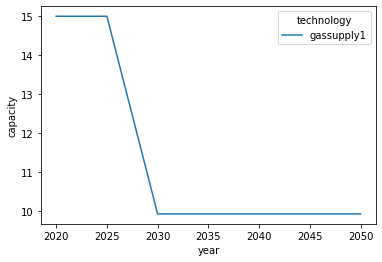

power


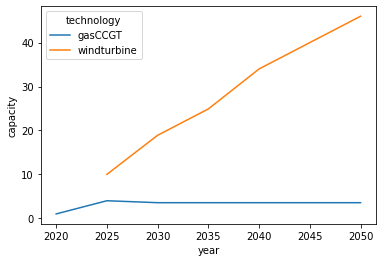

residential


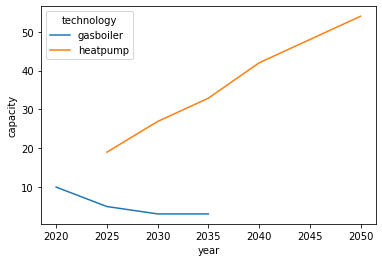

In [10]:
for group in MCACapacity.groupby("sector"):
    print(group[0])
    sns.lineplot(data=group[1], x="year", y="capacity", hue="technology")
    plt.show()
    plt.close()

gas


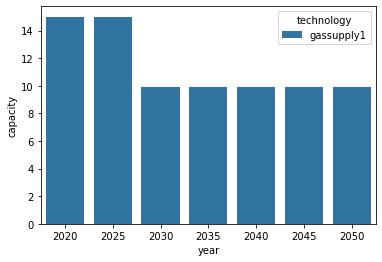

power


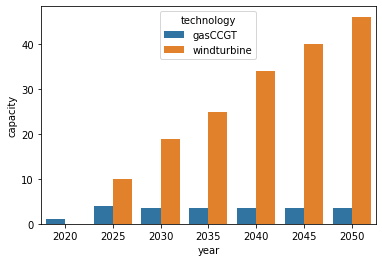

residential


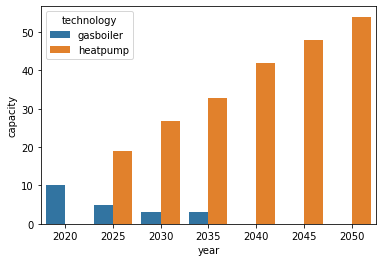

In [18]:
for group in MCACapacity.groupby("sector"):
    print(group[0])
    sns.barplot(data=group[1], x="year", y="capacity", hue="technology")
    plt.show()
    plt.close()

In [14]:
MCAPrices = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/6-Platform-MockUp/Proposal/Results/MCAPrices.csv")
MCAPrices.head()

,timeslice,commodity,region,prices,year
0,"('all-year', 'all-week', 'night')",electricity,R1,19.5000,2020
1,"('all-year', 'all-week', 'night')",gas,R1,7.1528,2020
2,"('all-year', 'all-week', 'night')",heat,R1,100.0000,2020
3,"('all-year', 'all-week', 'night')",CO2f,R1,0.0831,2020
4,"('all-year', 'all-week', 'morning')",electricity,R1,19.5000,2020


CO2f


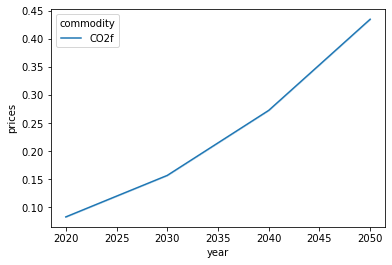

electricity


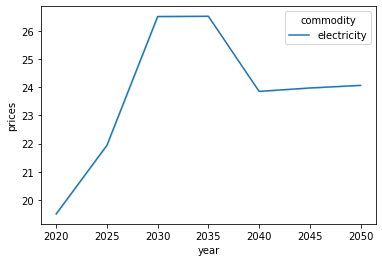

gas


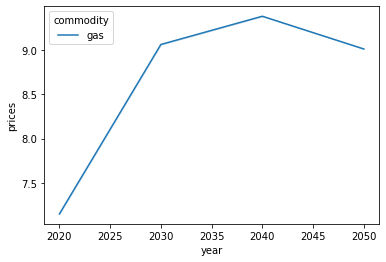

heat


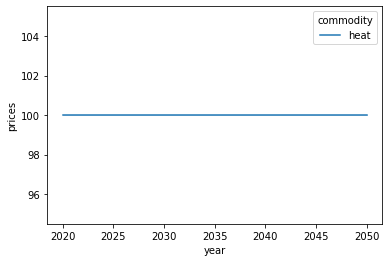

In [13]:
for group in MCAPrices.groupby("commodity"):
    print(group[0])
    sns.lineplot(data=group[1], x="year", y="prices", hue="commodity")
    plt.show()
    plt.close()

CO2f


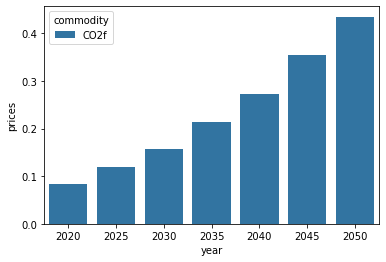

electricity


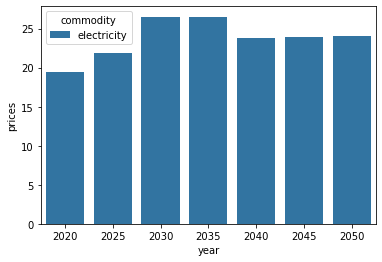

gas


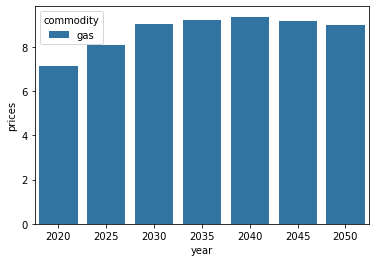

heat


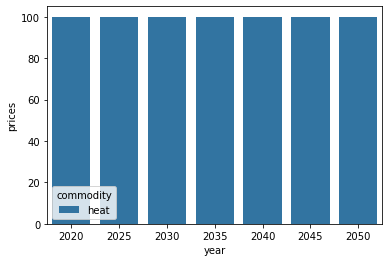

In [19]:
for group in MCAPrices.groupby("commodity"):
    print(group[0])
    sns.barplot(data=group[1], x="year", y="prices", hue="commodity")
    plt.show()
    plt.close()